# Project:  Reasons Behind Failed Medical Appointments ( Case Study: Brazilian Patients)

**Table of Contents:**
<ul>
    <li><a href='#introduction'> Introduction </a></li>
    <li><a href='#data wrangling'> Data Wrangling </a></li>
    <li><a href='#eda'> Exploratory Data Analysis </a></li>
    <li><a href='#conclusion'> Conclusions </a></li>
    </ul>


<a id='introduction'></a>

# INTRODUCTION

> **Name of Dataset:** Medical Appointments No Shows </br>
> **Dataset Source:** [Kaggle](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv.) </br>
> **Description of Dataset:**   </br>
This dataset collects information from over 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment and the associated characteristics of each patient.
> **Variable (Column) Information:** </br>
> Fourteen (14) columns in this data set: </br>
> <ol>
    <li> PatientId: Identification of the patient.
    <li> AppointmentID: Identification of each appointment.
    <li> Gender: The gender of the patient whether male or female.
    <li> ScheduledDay: Tells us on what day the patient set up their appointment.
    <li> AppointmentDay: The day of the actual appointment, when they have to visit the doctor.
    <li> Age: The age of the patient.
    <li> Neighbourhood: Location of the 
    <li> Scholarship: indicates whether or not the patient is enrolled in Brasilian welfare program - Bolsa Família.
    <li> Hipertension: Indicates whether the patient has Hypertension or not.
    <li> Diabetes: Indicates whether the patient has Diabetes or not.
    <li> Alcoholism: Indicates whether the patient is alcoholic or not.
    <li> Handcap: Indicates whether the patient is handicap or not.
    <li> SMS_received: Indicates whether the patient received a text message reminder or not.
    <li> No-show: Indicates whether the patient showed up for their appointment or not.
 </ol> 
&nbsp &nbsp &nbsp <b>Rationale:</b> Some of the column names were spelt wrongly, needs to be renamed with uniform casing.

### <u> Analysis Questions: </u>
> Which age group were more responsive to their medical appointments? What were the likely factors that contributed to this? <br> <ul>
> <b>Additional questions:</b>
> <ul> <li> What illnesses were they mostly suffering from? </li>
    <li> Was it because they received test messages? </li>
    <li> Was their enrollment in the scholarship a contributing factor to their responsiveness? </li> </ul>
    


In [64]:
# needed modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='data wrangling'></a>

# DATA WRANGLING

In [65]:
# read in data set
df = pd.read_csv('noshow.csv')

# preview of the first five (5) records of the data set
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Data Assessment:
<b>i. Overall property of the dataset:</b>


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [67]:
# get the dimension of the dataframe to compare with the number of rows and columns of the dataset
df.shape

(110527, 14)

<b>Rationale:</b> 
<ul> <li>The dataframe have 110527 rows which is consistent with the number of records contained in the dataset. As such, there are no missing value(s).</li>
        <li>The preview of the dataset shows that the AppointmentDay and ScheduledDay both have date-type records. However, the <i> info() </i> preview shows that they actually have <i>object</i> datatype. This might need to be fixed if we decide to perform some aggregation on these columns.</li>
        <li>There are no null values.</li>
    <li>No-show column contains <i>object</i> datatypes. This will be left as it is except otherwise. Since it would only be used for categorical visualization.</li> </ul>

 <b> ii. Summary Statistics</b> 

In [68]:
# aggregate preview of the dataset
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [69]:
#verify if the Handcap header entry is binary
df_hc = df[df['Handcap'] > 1 ]
df_hc.loc[:,['Handcap']].head()

,Handcap
946,2
1665,2
1666,2
2071,2
2091,2


Check if there are duplicate values

In [70]:
df.duplicated().any()

False

Check the number of unique values (appointments made)

In [71]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

<b> Rationale: </b> 
<ul> <li>The age group captured were pre-dominantly adults between the age of 18 to 55. With an average of 37 years.</li>
    <li>There seem to be some outlier(s) with the age records; a value of -1 can be seen from the above preview as the minimum age. This will be attended to during the data cleaning phase.</li>       <li>About 2% of the patients captured suffer from one form of handicap or the other.</li>
    <li>The Handcap header seem to have records greater than 1. For simplicity, this will be resolved so that its records are strictly binary.</li>
    <li>Over 40,000 appointments were made by patients who had already booked an appointment.</li> <li>At least two (2) patients were scheduled to meet the doctor on the same day. </li>
    
 <b> Summary: </b>
    - There are no missing records.
    - There are some outliers.
    - There are no null values.
    - Data types needs to be fixed.
    - Column names needs to be modified.
    - Handcap records needs to be modified.
    - Drop duplicate patient ID records.

### Data Cleaning:
<b>Objectives:</b>
- Modify header names.
- Fix outlier(s) in Age column.
- Modifiy Handcap column records.
- Drop duplicate records by the patient ID.

<b>Modify column names:</b> To be all lowercase and of minimal letters, to aid easy typing (order of arrangement remains the same).

In [72]:
# change column names
df.columns = ['p-id', 'a-id', 'sex', 's-day', 'a-day', 'age', 'h-loc', 'schlr', 'hpr', 'diab', 'alchl', 'hcap', 'sms', 'v-stat']
# preview change
df.head(1)

,p-id,a-id,sex,s-day,a-day,age,h-loc,schlr,hpr,diab,alchl,hcap,sms,v-stat
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


<b> Fix <i>Age</i> column outlier(s) </b>

In [73]:
# check to see ages < 0 (zero)
age_outliers = df[df.age < 0]
age_outliers.age.head()

99832   -1
Name: age, dtype: int64

There's only one (1) occurrence where age is less than zero. This is an insignificant count for an outlier. As such, the record will be drop.

In [74]:
# remove outlier row from the age column 
df = df[df['age'] >= 0]

# confirm that row has been removed
df.loc[99830:99835]

,p-id,a-id,sex,s-day,a-day,age,h-loc,schlr,hpr,diab,alchl,hcap,sms,v-stat
99830,7.216327e+14,5774220,M,2016-06-06T07:59:53Z,2016-06-06T00:00:00Z,1,ROMÃO,0,0,0,0,0,0,No
99831,9.825178e+13,5774337,M,2016-06-06T08:08:00Z,2016-06-06T00:00:00Z,7,CRUZAMENTO,0,0,0,0,0,0,No
99833,2.898271e+13,5774075,M,2016-06-06T07:50:27Z,2016-06-06T00:00:00Z,1,FORTE SÃO JOÃO,0,0,0,0,0,0,No
99834,9.276419e+14,5773979,F,2016-06-06T07:42:52Z,2016-06-06T00:00:00Z,0,ROMÃO,0,0,0,0,0,0,No
99835,3.456372e+14,5773464,F,2016-06-06T07:15:03Z,2016-06-06T00:00:00Z,1,GURIGICA,0,0,0,0,0,0,No


<b> Modify <i>Handcap</i> column </b>

In [75]:
# convert values greater than 1 to 1 in the handicap column via .mask() method
df['hcap'].mask(df['hcap'] >= 1, 1, inplace=True)
# confirmation
df.hcap.nunique()

2

<b> Drop duplicate records from the Patient's ID column </b>

In [76]:
# drop duplicates by the patient's iD column
df.drop_duplicates('p-id', inplace=True)
# confirm
df.shape

(62298, 14)

<b>Summary:</b> I have modified the column names to all be lowercase and concise to help recall and type them easily. The negative values in the age column have been removed. The records of the handicap column have been modified to be binary (having only 1s and 0s), where 1, indicates that the patient was handicap and 0, they do not. Finally, I reduced the rows of the dataframe to match the number of unique patients that booked an appointment since the scope of this analysis will focus only on the age, illnesses, scholarship, sms and visits headers/columns.

<a id='eda'></a>

# EXPLORATORY DATA ANALYSIS

<b>Questions To Answer:</b> <ul> <li>Which age group were more responsive to their appointments?</li>
    <li>What illnesses were they most suffering from?</li>
    <li>Was it because they received text message or not?</li>
    <li>Was their enrollment in the scholarship a contributing factor to their responsives?</li>

#### Question 1: Which age group were more responsive to their appointments?

First we create a new columnn for that indicates all the various classes of age groups:

- Children: 0-14 years
- Youths: 15-24 years
- Adults: 25-64 years
- Seniors: 64+


<b>Sources:</b>[*Statistics Canada*](https://www.statcan.gc.ca/en/concepts/definitions/previous/age1a)

In [77]:
# create new column with age records
df['age-grp'] = df['age']

def col_int2str(df,col,num,char):
    df.loc[df[col].isin(num), col] = char;
    
col_int2str(df,'age-grp',range(0,15),'children')
col_int2str(df,'age-grp',range(15,25),'youths')
col_int2str(df,'age-grp',range(25,65),'adults')
col_int2str(df,'age-grp',range(65,200),'seniors')

# confirm results
df.head()

,p-id,a-id,sex,s-day,a-day,age,h-loc,schlr,hpr,diab,alchl,hcap,sms,v-stat,age-grp
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,adults
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,adults
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,adults
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,children
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,adults


Since our interest for this analysis will involve only the illnesses, sms, scholarship, visits, age, and age group, I'll drop the other columns to avoid distractions. 

In [78]:
# sub-df
new_df = df.iloc[:, np.r_[5,7:15]]
# preview 
new_df.head()

,age,schlr,hpr,diab,alchl,hcap,sms,v-stat,age-grp
0,62,0,1,0,0,0,0,No,adults
1,56,0,0,0,0,0,0,No,adults
2,62,0,0,0,0,0,0,No,adults
3,8,0,0,0,0,0,0,No,children
4,56,0,1,1,0,0,0,No,adults


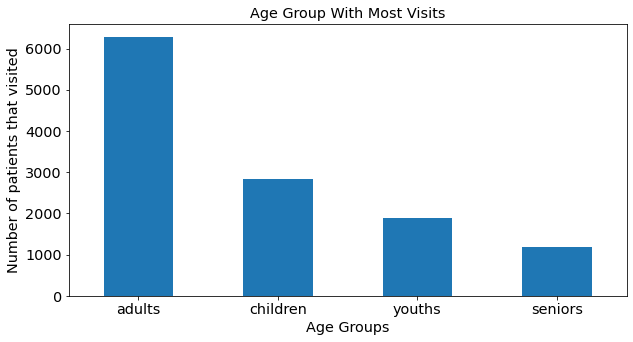

In [79]:
# modify plots settings globally
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'medium',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

# number of persons that responded to appointment by age group
visited = new_df[new_df['v-stat'] == 'Yes']
visited['age-grp'].value_counts().plot(kind='bar', xlabel='Age Groups',
                                       ylabel='Number of patients that visited',
                                      title='Age Group With Most Visits',
                                      figsize=(10,5),
                                      rot=0);


In [80]:
# adult patients who were present for their appointment
adults_present = visited[visited['age-grp'] == 'adults']

# summary statistics of their age
adults_present['age'].describe()

count    6281.000000
mean       42.964496
std        11.261788
min        25.000000
25%        33.000000
50%        42.000000
75%        52.000000
max        64.000000
Name: age, dtype: float64

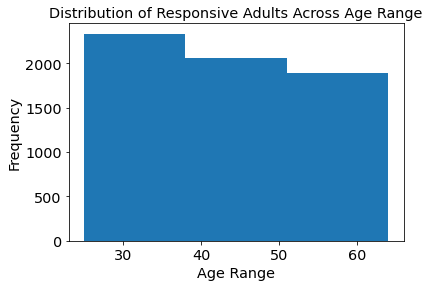

In [81]:
# plot to see the distribution adults across several age range
adults_present['age'].plot(kind='hist', bins=3, 
                          title='Distribution of Responsive Adults Across Age Range',
                          range=(25,64));
plt.xlabel('Age Range');

From the graph above, the majority of adults who responded to their appointments were between the age of 25-38 years of age.

#### Question 2: What illnesses were they most suffering from?

Subsetting the dataframe to include adults only so as to find out which illness they were most suffering from.

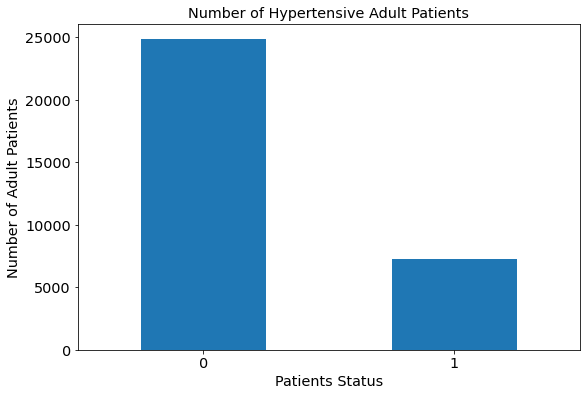

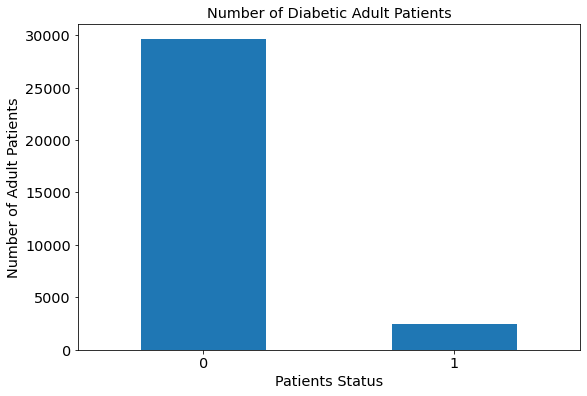

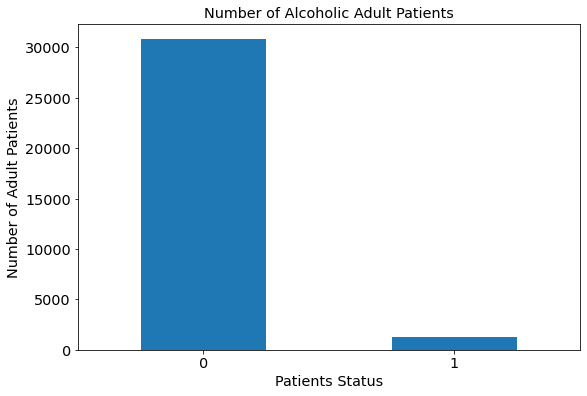

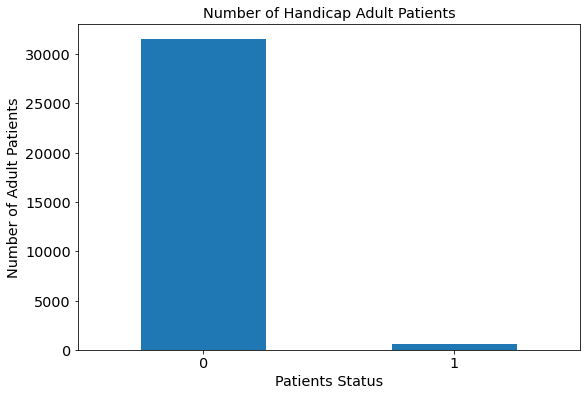

In [82]:
# df containing only adults
adults = df[df['age-grp'] == 'adults']

# function to plot bar charts by value counts with necessary args
def plot_barcount(df,title):
    df.value_counts().plot(kind='bar',
                          xlabel='Patients Status',
                          ylabel='Number of Adult Patients',
                          title=title,
                          figsize=(9,6),
                          rot=0);
    plt.show() # display plot

# hypertensive patients
plot_barcount(adults['hpr'],'Number of Hypertensive Adult Patients')

# diabetic patients
plot_barcount(adults['diab'],'Number of Diabetic Adult Patients')

# alcoholic patients
plot_barcount(adults['alchl'],'Number of Alcoholic Adult Patients')

# handicap patients
plot_barcount(adults['hcap'],'Number of Handicap Adult Patients')


<b>Rationale:</b> Most patients were hypertensive.


#### Question 3: Was it because they received text messages?

Check for correllation between the SMS and Visits columns

,p-id,a-id,sex,s-day,a-day,age,h-loc,schlr,hpr,diab,alchl,hcap,sms,v-stat,age-grp
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0,adults
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0,adults
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0,adults
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0,adults
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,1,adults


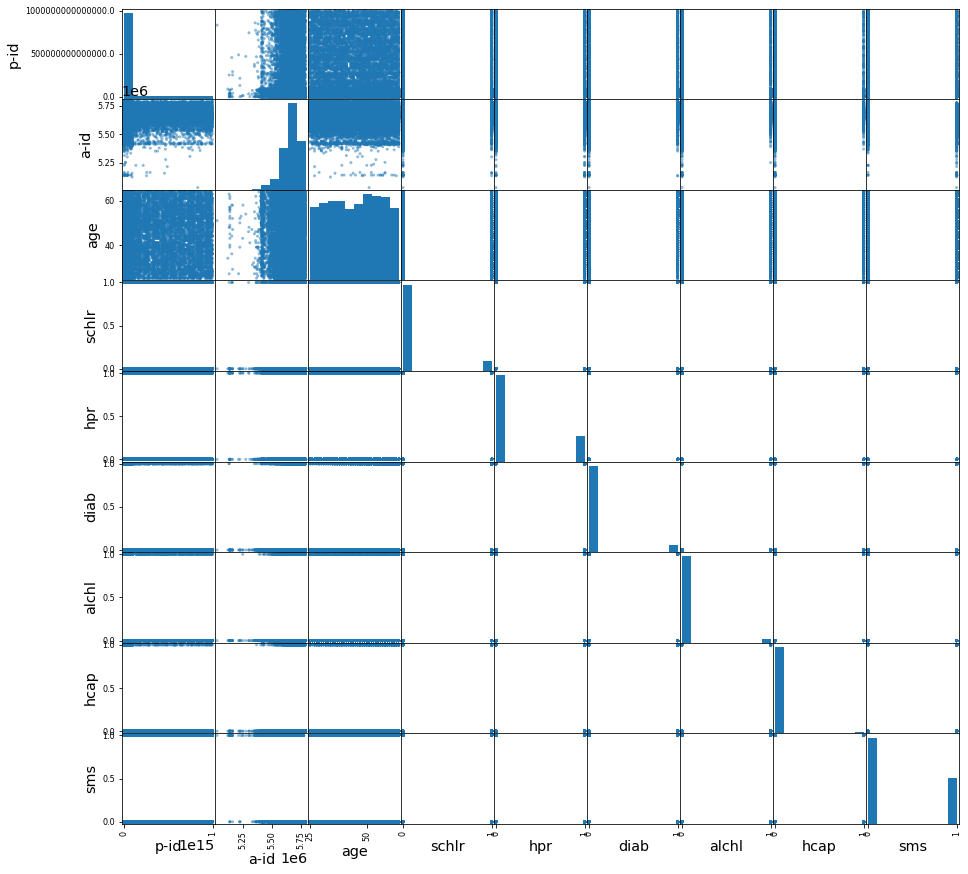

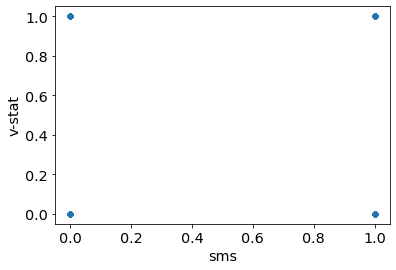

In [83]:
# sub-df for adults with numeric values for visits
adult_num_visit= df[df['age-grp'] == 'adults']

# change visit status to numerical values
adult_num_visit.loc[df['v-stat'] == 'Yes', 'v-stat'] = 1
adult_num_visit.loc[df['v-stat'] == 'No', 'v-stat'] = 0

display(adult_num_visit.head())

# check for general correlation
pd.plotting.scatter_matrix(adult_num_visit, figsize = (15,15));

# check for correlation between text msgs sent and visit status
adult_num_visit.plot.scatter(x='sms', y='v-stat');


There seem to be no correlation between the sms and visit columns

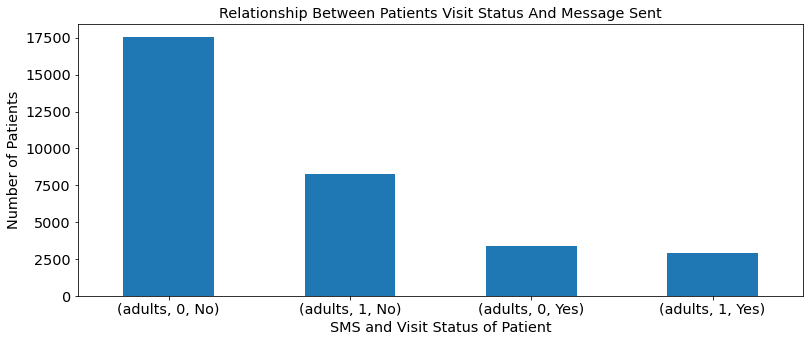

In [84]:
 adults.groupby('age-grp')[['sms','v-stat']].value_counts().plot(kind='bar', rot=0, figsize=(13,5),
                    xlabel='SMS and Visit Status of Patient', ylabel='Number of Patients',
                        title='Relationship Between Patients Visit Status And Message Sent');

Most adult patients who received text messages did not respond to their appointment

#### Question 4: Was their enrollment in the scholarship a contributing factor to their responsives?

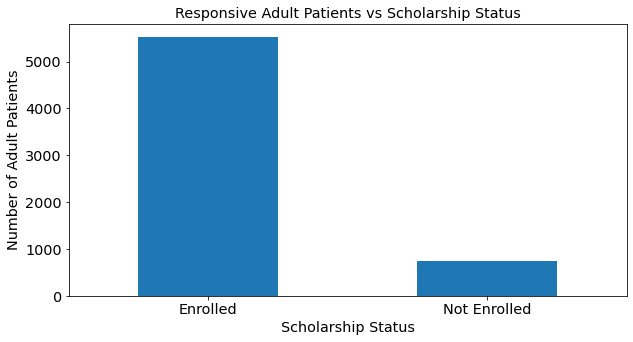

In [85]:
# sub-df of adults who visited
visited_adults = visited[visited['age-grp'] == 'adults']

# silent chain assigment warning
pd.options.mode.chained_assignment = None

# change variable type of scholarship column to make it ideal for plot
visited_adults.loc[visited_adults['schlr'] == 0, 'schlr'] = 'Enrolled'
visited_adults.loc[visited_adults['schlr'] == 1, 'schlr'] = 'Not Enrolled'

# bar plot to see relationship between scholarship and visits
visited_adults.schlr.value_counts().plot(kind='bar', rot=0, xlabel='Scholarship Status',
                                ylabel='Number of Adult Patients', 
                title='Responsive Adult Patients vs Scholarship Status',
                    figsize=(10,5));

<b> Rationale: </b> Adults who visited were not enrolled in the scholarship program.

<a id='conclusion'></a>
# CONCLUSIONS

<ol><li> Adults between the age range of 25 years to 65 years old were most responsive to their appointments. With the majority being between 25-38 years of age.</li>
    <li> Most adults suffered from hypertension and those within this category seemed to be more concerned about their health than others as they were most responsive to their appointments. </li><li> Text message reminders as well as enrollment in the scholarship program did not have any impact in the responsiveness of those who visited on the day of their appointment.</li></ol>
    
<b>Limitations:</b><ul><li>There was a negative value amongst the age records.</li>
    <li>There was some spelling errors with the column names.</li>
    <li>Records for the <b>handicap</b> column were not properly explained. Created some ambiguity.</li>